In [59]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100 , n_features= 2 ,
                          n_informative=1 , n_redundant = 0,
                          n_classes = 2 , n_clusters_per_class=1,
                          random_state=41 , hypercube = False ,class_sep = 20)

In [60]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


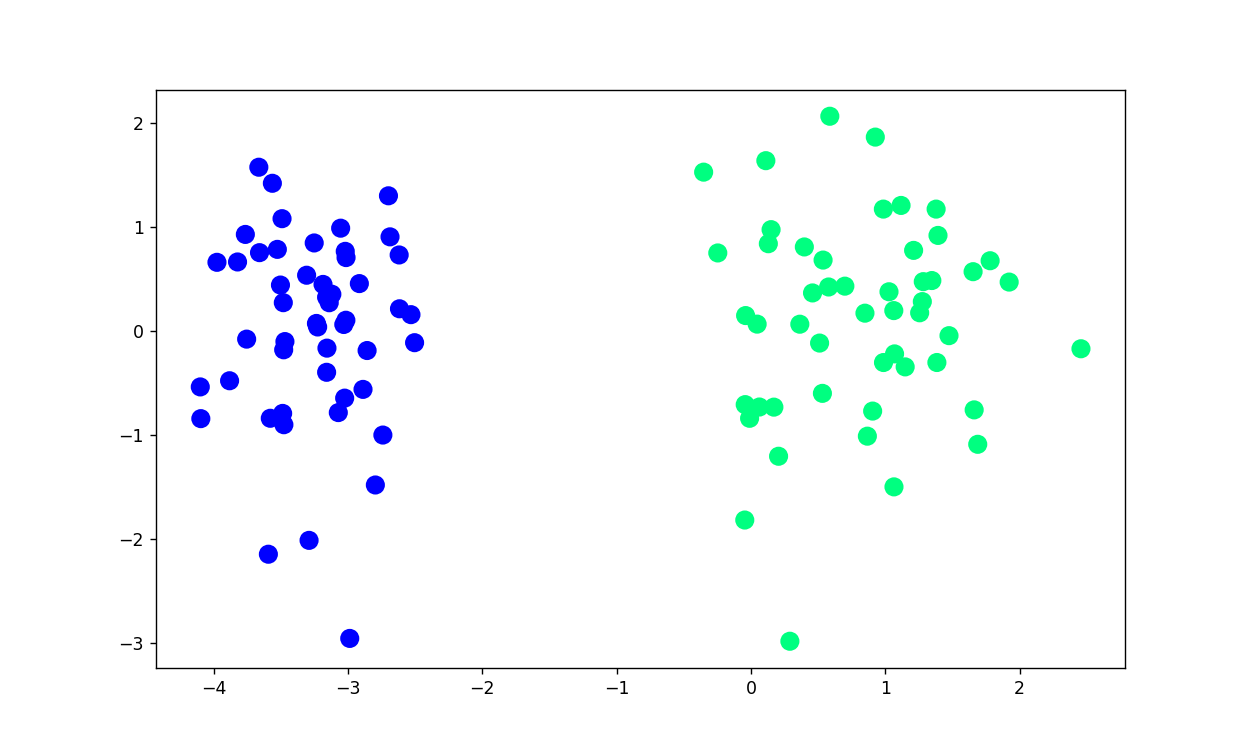

In [61]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0] , X[:,1] , c = y , cmap = 'winter'  ,s =100)

In [62]:
def perceptron(X,y):
    X=np.insert(X,0 ,1 , axis =1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[j] , weights))
        weights = weights + lr * (y[j] - y_hat)*X[j]
    
    return weights[0] , weights[1:]

In [63]:
def step(z):
    return 1 if z>0 else 0

In [64]:
step(-0.294)

0

In [65]:
intercept_ , coef_ = perceptron(X,y)

In [66]:
print(coef_)
print(intercept_)

[1.0580085  0.40381514]
1.2000000000000002


In [67]:
m = - (coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [68]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


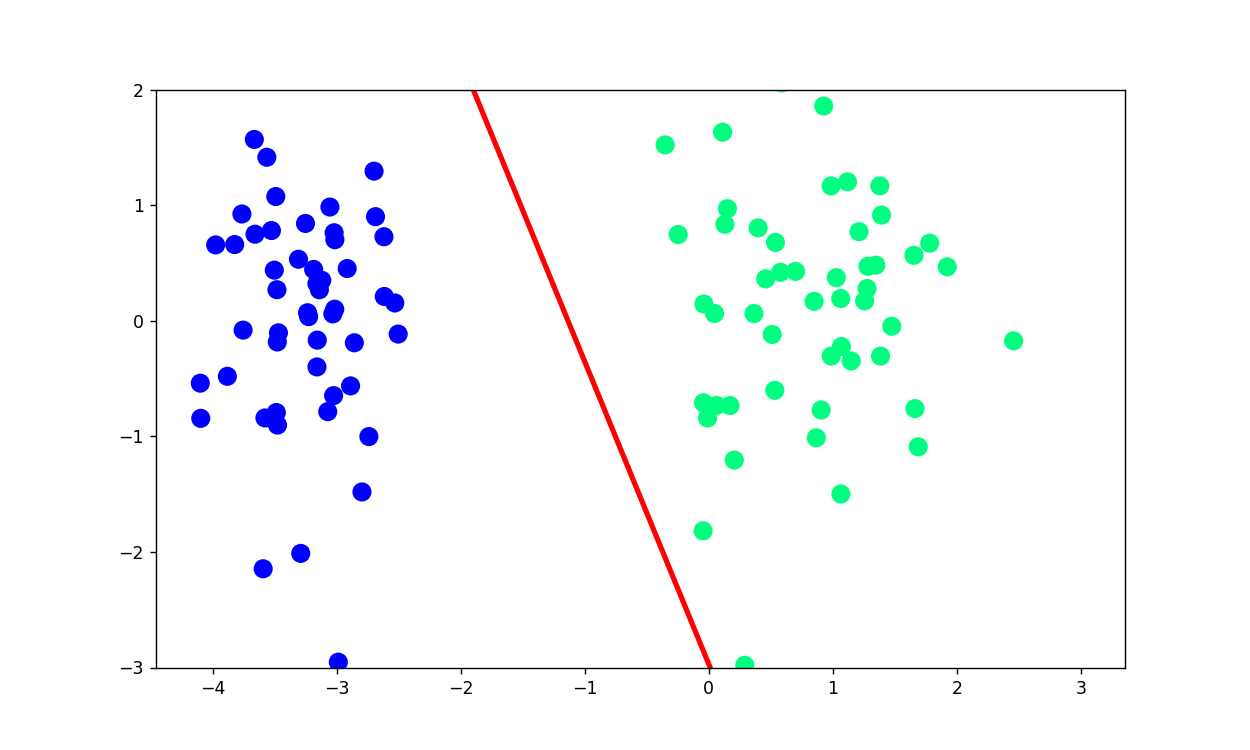

(-3.0, 2.0)

In [69]:
plt.figure(figsize = (10,6))
plt.plot(x_input ,y_input , color = 'red' , linewidth =3)
plt.scatter(X[:,0] , X[:,1] , c =y , cmap='winter' , s =100)
plt.ylim(-3,2)

In [70]:
def perceptron(X,y):
    
    m= []
    b = []
    
    X=np.insert(X,0 ,1 , axis =1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[j] , weights))
        weights = weights + lr * (y[j] - y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    
    return m,b

In [71]:
m, b = perceptron(X,y)

In [72]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


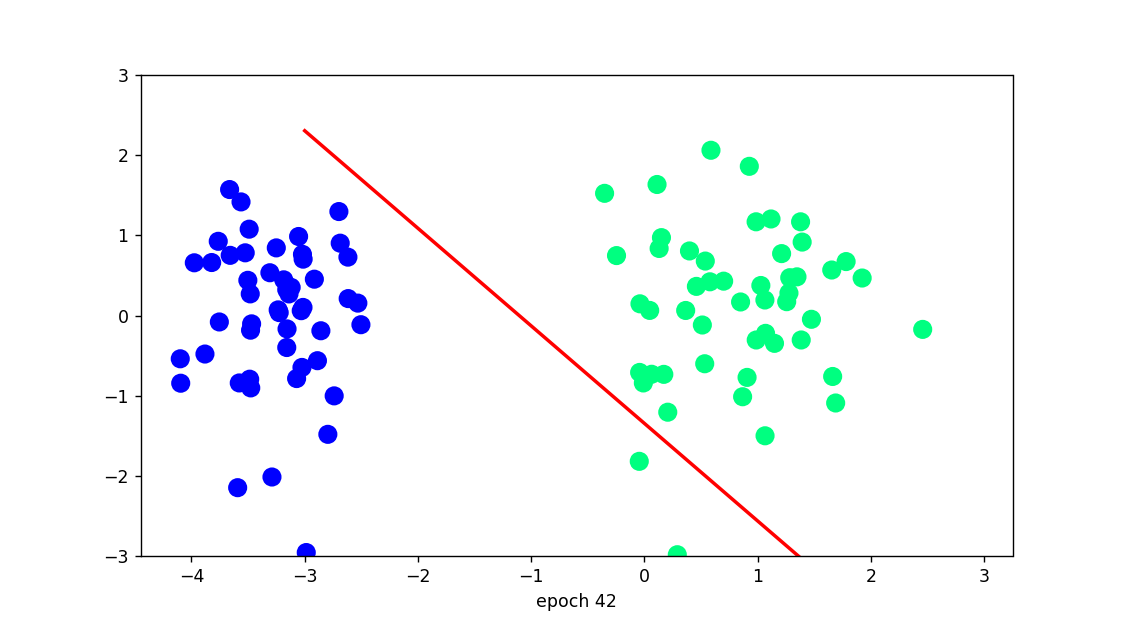

In [73]:
fig, ax = plt.subplots(figsize=(9,5))
x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)   
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [74]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)


LogisticRegression()

In [75]:
m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])

In [87]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input+ b

<IPython.core.display.Javascript object>


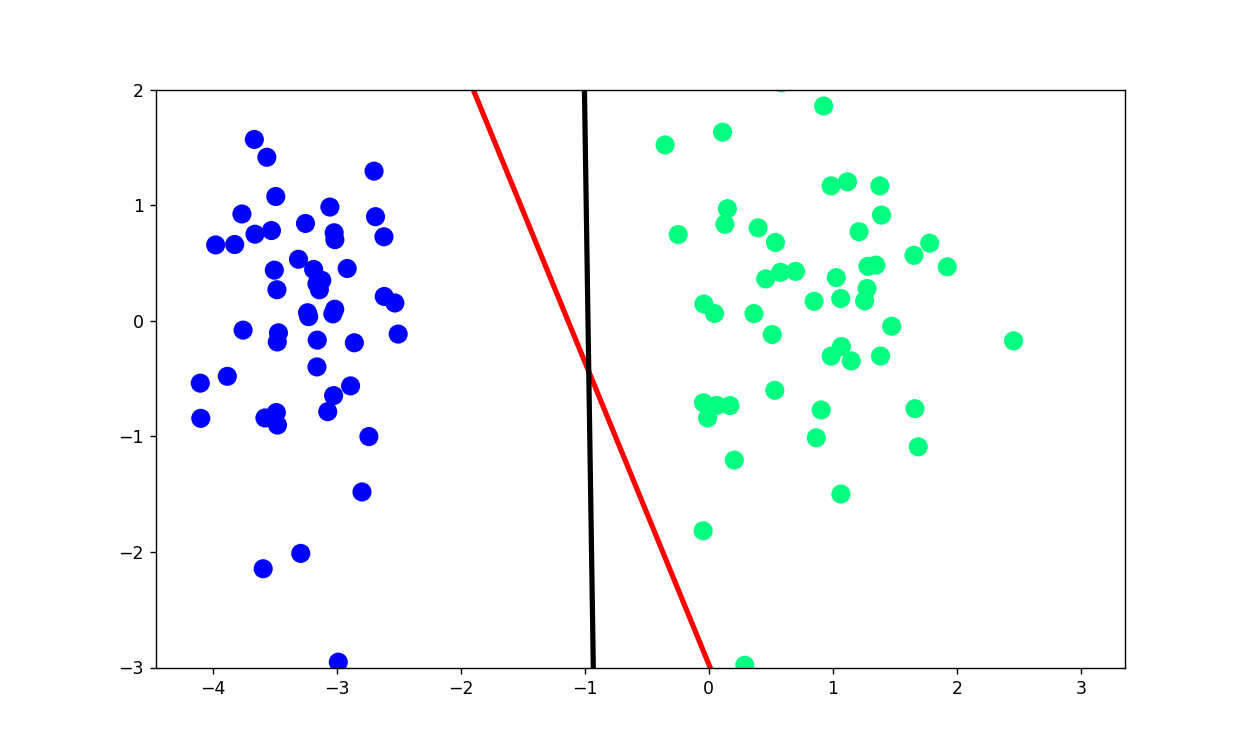

(-3.0, 2.0)

In [89]:
plt.figure(figsize = (10,6))
plt.plot(x_input ,y_input , color = 'red' , linewidth =3)
plt.plot(x_input1 ,y_input1 , color = 'black' , linewidth =3)
plt.scatter(X[:,0] , X[:,1] , c =y , cmap='winter' , s =100)
plt.ylim(-3,2)

# Logistic Regression with Sigmoid Function

In [78]:
def perceptron(X,y):
    X = np.insert(X ,0,1 , axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(X.shape[0])
        y_hat  = sigmoid(np.dot(X[j] , weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
    
    return weights[0],weights[1:]

In [79]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [80]:
intercept_ , coef_ = perceptron(X,y)

In [82]:
intercept_ , coef_

(2.7713899023277895, array([2.84626546, 0.04062605]))

In [83]:
m = - (coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [84]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

<IPython.core.display.Javascript object>


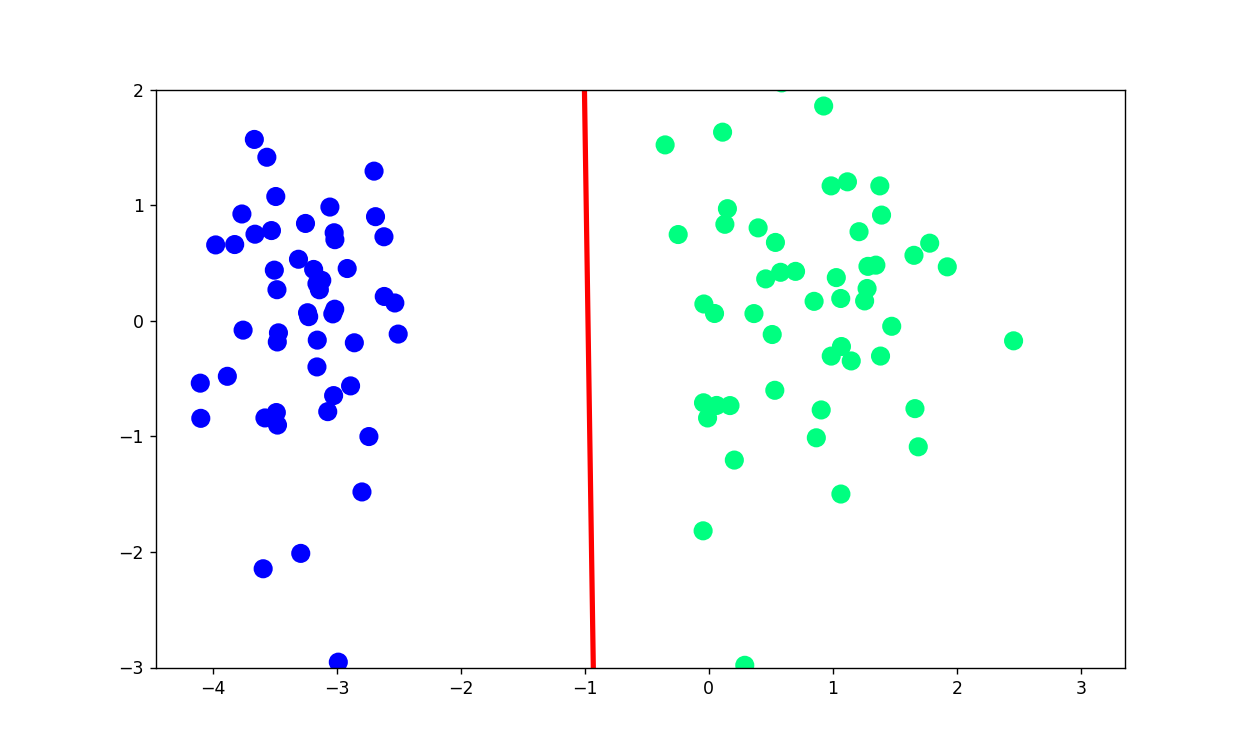

(-3.0, 2.0)

In [85]:
plt.figure(figsize = (10,6))
plt.plot(x_input2 ,y_input2 , color = 'red' , linewidth =3)
plt.scatter(X[:,0] , X[:,1] , c =y , cmap='winter' , s =100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>


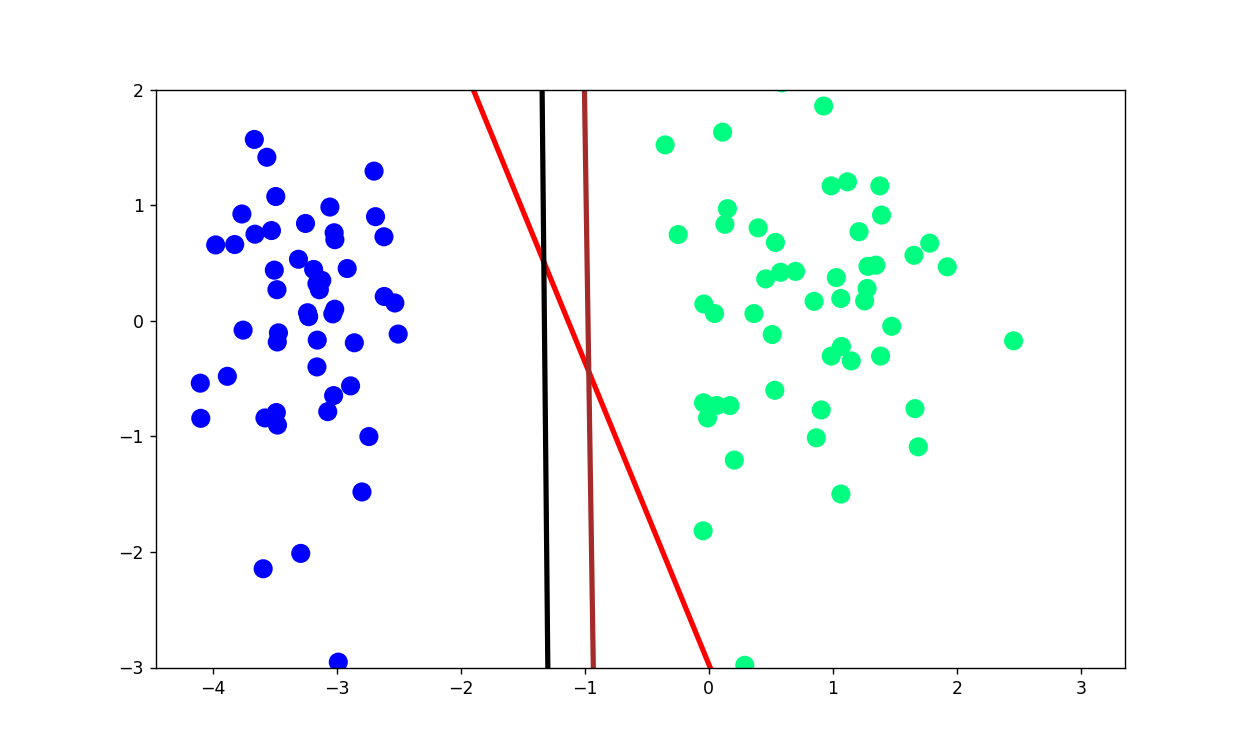

(-3.0, 2.0)

In [86]:
plt.figure(figsize = (10,6))
plt.plot(x_input ,y_input , color = 'red' , linewidth =3)
plt.plot(x_input1 ,y_input1 , color = 'black' , linewidth =3)
plt.plot(x_input2 ,y_input2 , color = 'brown' , linewidth =3)
plt.scatter(X[:,0] , X[:,1] , c =y , cmap='winter' , s =100)
plt.ylim(-3,2)